In [28]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [17]:
data = pd.read_csv("D:/New folder/Python/cognitive_cluster/Wholesale customers data.csv")
data.head()

,Fresh,Milk,Grocery,Frozen
0,12669,9656,7561,214
1,7057,9810,9568,1762
2,6353,8808,7684,2405
3,13265,1196,4221,6404
4,22615,5410,7198,3915


In [19]:
data.shape

(440, 4)

array([[<Axes: title={'center': 'Fresh'}>,
        <Axes: title={'center': 'Milk'}>],
       [<Axes: title={'center': 'Grocery'}>,
        <Axes: title={'center': 'Frozen'}>]], dtype=object)

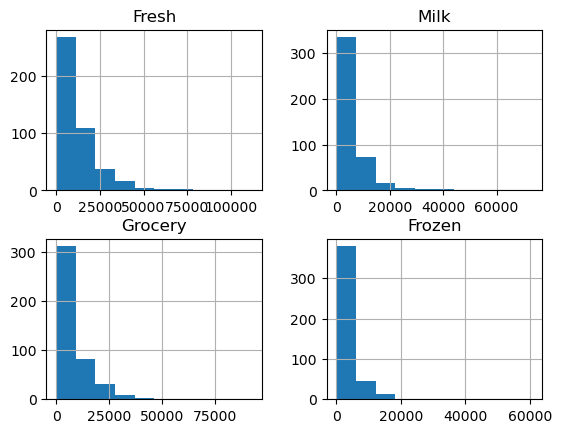

In [21]:
data.hist()

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

Text(0, 0.5, 'Within-cluster Sum of Squares')

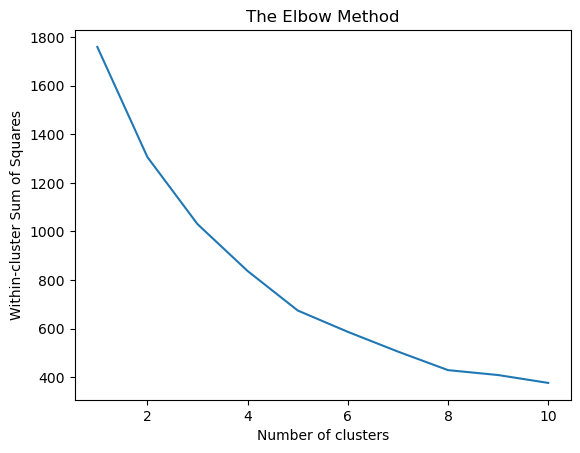

In [32]:
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Compute the Within-Cluster Sum of Squares (WCSS) for different k values
wcss = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
number_clusters = range(1,11)
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

From the Elbow Method plot, the optimal number of clusters (k) appears to be 2, as the WCSS curve shows a significant drop and then flattens after k=2.

Now, let's apply K-Means clustering with k=2k=2 and visualize the clusters.

In [34]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
data['Cluster'] = kmeans.fit_predict(data_scaled)

data.head()

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


,Fresh,Milk,Grocery,Frozen,Cluster
0,12669,9656,7561,214,0
1,7057,9810,9568,1762,0
2,6353,8808,7684,2405,0
3,13265,1196,4221,6404,0
4,22615,5410,7198,3915,0


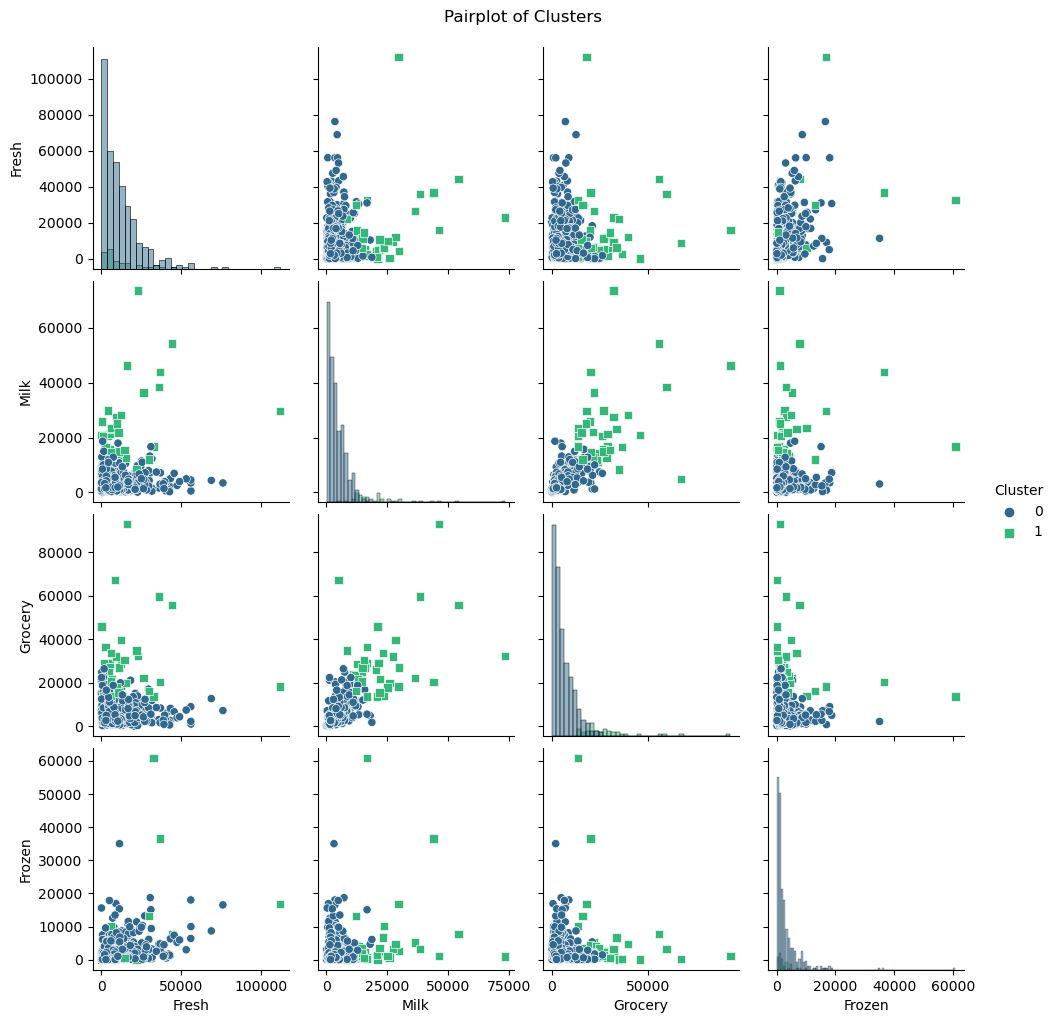

In [54]:
import seaborn as sns

sns.pairplot(data, hue="Cluster", palette="viridis", diag_kind="hist", markers=["o", "s"])
plt.suptitle("Pairplot of Clusters", y=1.02)
plt.show()



Now, let's apply K-Means clustering with k=5 and visualize the clusters.

In [59]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
data['Cluster'] = kmeans.fit_predict(data_scaled)


data.head()

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


,Fresh,Milk,Grocery,Frozen,Cluster
0,12669,9656,7561,214,0
1,7057,9810,9568,1762,0
2,6353,8808,7684,2405,0
3,13265,1196,4221,6404,0
4,22615,5410,7198,3915,2


C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: 
The markers list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: 
The markers list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: 
The markers list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: 
The markers list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: 
The markers list has fewe

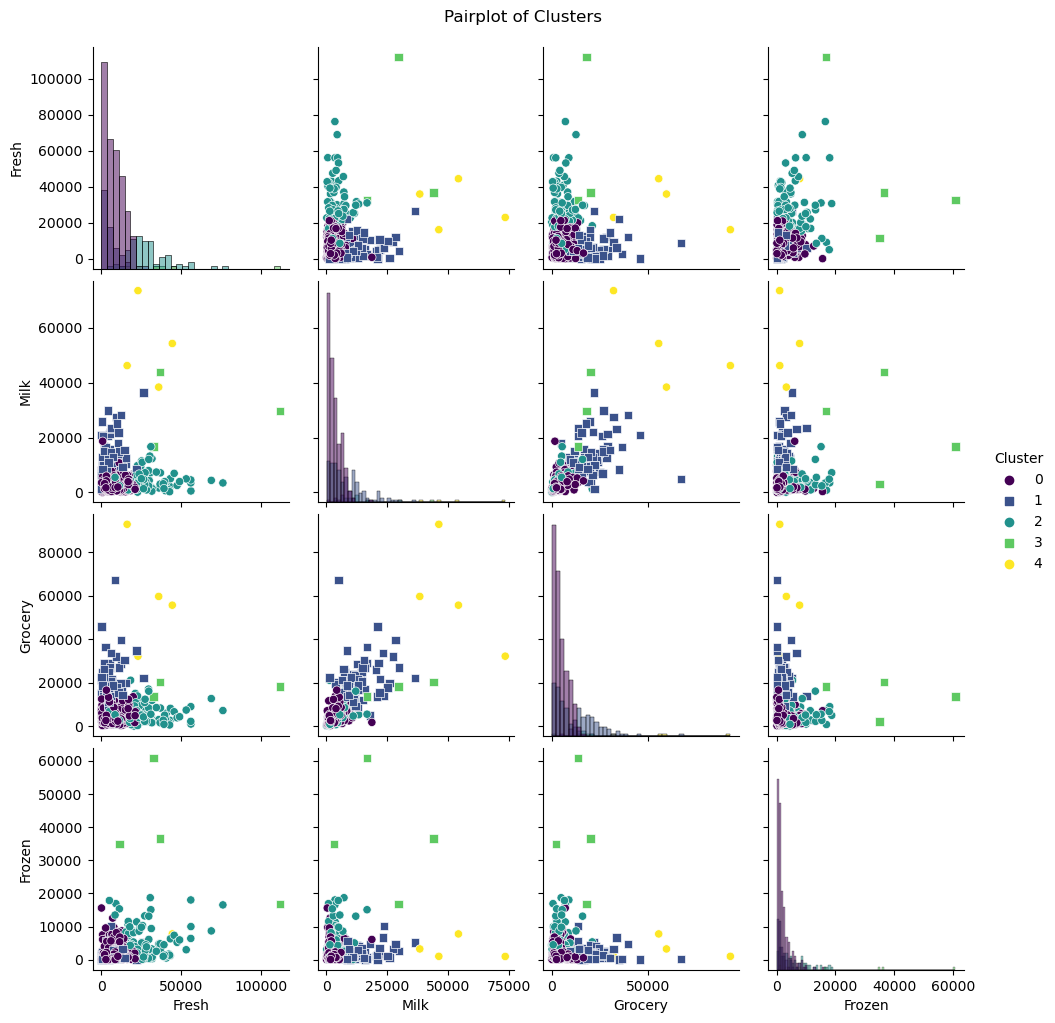

In [61]:
sns.pairplot(data, hue="Cluster", palette="viridis", diag_kind="hist", markers=["o", "s"])
plt.suptitle("Pairplot of Clusters", y=1.02)
plt.show()
